In [1]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

mlflow.set_tracking_uri('http://13.51.140.113:5000/')


In [3]:
# Load data
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train a simple model
n_estimators=15
random_state=32

model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
model.fit(X_train, y_train)

# Make predictions and calculate metrics
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)


In [2]:

#important !!
mlflow.set_tracking_uri('http://localhost:5000')
mlflow.set_tracking_uri('http://13.51.140.113:5000/')


# Start an MLflow run
with mlflow.start_run():

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)

    # Make predictions and calculate metrics
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("random_state", random_state)
    mlflow.log_metric("mse", mse)
    mlflow.sklearn.log_model(model, "model")
    print(f"Model logged with MSE: {mse}")


2024/12/16 15:12:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged with MSE: 3009.743970037454
🏃 View run placid-slug-7 at: http://localhost:5000/#/experiments/0/runs/afaa0c7b54a3408fa09bc63b1cc75edd
🧪 View experiment at: http://localhost:5000/#/experiments/0


In [3]:
experiment_name = "Diabetes"
mlflow.set_experiment(experiment_name)

    
with mlflow.start_run(run_name=f"diabetes_RForest_{n_estimators}"):

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)

    # Make predictions and calculate metrics
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("random_state", random_state)
    mlflow.log_metric("mse", mse)
    mlflow.sklearn.log_model(model, "model")
    print(f"Model logged with MSE: {mse}")


2024/12/16 15:20:06 INFO mlflow.tracking.fluent: Experiment with name 'Diabetes' does not exist. Creating a new experiment.
2024/12/16 15:20:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged with MSE: 3009.743970037454
🏃 View run diabetes_RForest_15 at: http://localhost:5000/#/experiments/653027391595642036/runs/445cae9b256341c5b277b80d6d507146
🧪 View experiment at: http://localhost:5000/#/experiments/653027391595642036


In [12]:
pd.DataFrame(data['data'], columns=data['feature_names']).sample(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
332,0.030811,-0.044642,0.104809,0.076958,-0.011201,-0.011335,-0.058127,0.034309,0.057108,0.036201


In [6]:
X_test[0]

array([ 0.04534098, -0.04464164, -0.00620595, -0.01599898,  0.1250187 ,
        0.1251981 ,  0.019187  ,  0.03430886,  0.03243232, -0.0052198 ])

2024/12/17 09:50:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run wise-dolphin-93 at: http://13.51.140.113:5000/#/experiments/985020413726465322/runs/a3ed7b5b17324fb7af364966f9ad109d
🧪 View experiment at: http://13.51.140.113:5000/#/experiments/985020413726465322


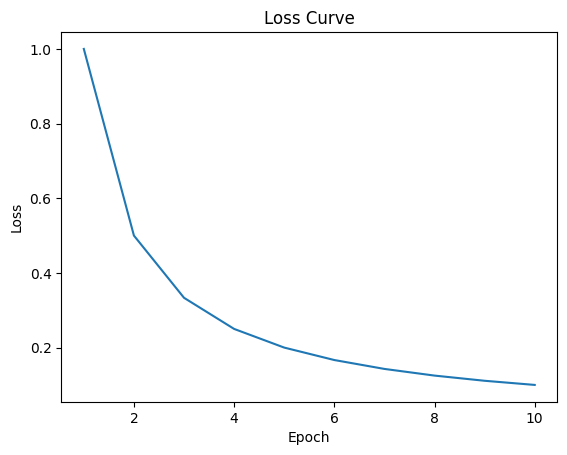

In [6]:
import matplotlib.pyplot as plt

# Simulate metric logging
with mlflow.start_run():
    for epoch in range(1, 11):
        loss = 1 / epoch  # Example loss function
        mlflow.log_metric("loss", loss, step=epoch)

    # Save and log a plot as an artifact
    plt.plot(range(1, 11), [1 / epoch for epoch in range(1, 11)])
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.savefig("loss_curve.png")
    mlflow.log_artifact("loss_curve.png", artifact_path="figure")
    mlflow.sklearn.log_model(model, "model")

In [10]:
import json
with open("parametre.json", "w" ) as f:
    f.write(str({"n_estimators": n_estimators , "random_state": random_state ,"mse": mse }))


In [11]:
experiment_name = "Diabetes-3"
mlflow.set_experiment(experiment_name)
mlflow.set_tracking_uri('http://13.51.140.113:5000/')


random_state=500

for n_estimators in [50, 55]:
    
    with mlflow.start_run(run_name=f"diabetes_RForest_{n_estimators}"):

        model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        model.fit(X_train, y_train)

        # Make predictions and calculate metrics
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)

        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("random_state", random_state)
        mlflow.log_metric("mse", mse)
        mlflow.sklearn.log_model(model, "model")

        with open("parametre.json", "w" ) as f:
            f.write(str({"n_estimators": n_estimators , "random_state": random_state ,"mse": mse }))

        mlflow.log_artifact("parametre.json", artifact_path="figure")


        print(f"Model logged with MSE: {mse}")

        # Log model to MLflow
        input_example = pd.DataFrame(data['data'], columns=data['feature_names']).sample(1)
        mlflow.sklearn.log_model(sk_model=model, artifact_path='model',input_example=input_example)


2024/12/17 09:56:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged with MSE: 3070.8045707865176


/home/mmby/Freelance/mlflow_project/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/mmby/Freelance/mlflow_project/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


🏃 View run diabetes_RForest_50 at: http://13.51.140.113:5000/#/experiments/985020413726465322/runs/de4a8a6f05dd4a169c8ae16b4391bc1c
🧪 View experiment at: http://13.51.140.113:5000/#/experiments/985020413726465322


2024/12/17 09:56:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged with MSE: 3068.8356356207637


/home/mmby/Freelance/mlflow_project/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/mmby/Freelance/mlflow_project/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


🏃 View run diabetes_RForest_55 at: http://13.51.140.113:5000/#/experiments/985020413726465322/runs/2933bc841b164630ba16f1067fda24a9
🧪 View experiment at: http://13.51.140.113:5000/#/experiments/985020413726465322


In [14]:
from mlflow.models import validate_serving_input

model_uri = 'runs:/f33e7d4699d6423ba59a5d30252a0cde/model'

# The model is logged with an input example. MLflow converts
# it into the serving payload format for the deployed model endpoint,
# and saves it to 'serving_input_payload.json'
serving_payload = """{
  "dataframe_split": {
    "columns": [
      "age",
      "sex",
      "bmi",
      "bp",
      "s1",
      "s2",
      "s3",
      "s4",
      "s5",
      "s6"
    ],
    "data": [
      [
        0.016280675727306498,
        0.05068011873981862,
        -0.04608500086939666,
        0.011543832586488917,
        -0.033215875558837024,
        -0.016031855130326858,
        -0.010266105415242439,
        -0.002592261998183278,
        -0.04398377252276359,
        -0.042498766648810526
      ]
    ]
  }
}"""

# Validate the serving payload works on the model
validate_serving_input(model_uri, serving_payload)

/home/mmby/Freelance/mlflow_project/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([59.96666667])